In [1]:
import pandas as pd

In [2]:
data = {
    'Mês': ['Setembro'] * 5,
    'Nome do Dentista': ['Dr. João Silva', 'Dra. Maria Oliveira', 'Dr. Pedro Souza', 'Dra. Ana Carvalho', 'Dr. Rafael Martins'],
    'Clientes Gerados pela Contento': [15, 10, 8, 12, 20],
    'Procedimentos de Odontologia Estética': [
        'Harmonização Facial, Clareamento Dental, Preenchimento Labial',
        'Lentes de Contato Dental, Botox, Clareamento Dental',
        'Facetas de Porcelana, Preenchimento Labial',
        'Clareamento Dental, Ortodontia Estética, Lentes de Contato Dental',
        'Implante Estético, Lentes de Contato Dental, Clareamento Dental, Harmonização Facial'
    ],
    'Número de Procedimentos Realizados': [30, 25, 10, 15, 40],
    'Preços dos Procedimentos (R$)': [
        {'Harmonização Facial': 800, 'Clareamento Dental': 600, 'Preenchimento Labial': 700},
        {'Lentes de Contato Dental': 1500, 'Botox': 1200, 'Clareamento Dental': 600},
        {'Facetas de Porcelana': 2000, 'Preenchimento Labial': 700},
        {'Clareamento Dental': 600, 'Ortodontia Estética': 1500, 'Lentes de Contato Dental': 1500},
        {'Implante Estético': 5000, 'Lentes de Contato Dental': 1500, 'Clareamento Dental': 600, 'Harmonização Facial': 800}
    ]
}


In [3]:
df = pd.DataFrame(data)


In [4]:
faturamento_total = []


In [5]:
for index, row in df.iterrows():
    procedimentos = row['Procedimentos de Odontologia Estética'].split(', ')
    precos = row['Preços dos Procedimentos (R$)']
    
    total = 0
    # Aqui consideramos que cada dentista pode ter vários procedimentos
    for procedimento in procedimentos:
        # Obter o preço do procedimento
        if procedimento in precos:
            # Para o cálculo, precisamos saber quantos de cada procedimento foram realizados
            # Vamos dividir o número total de procedimentos pelo número de tipos de procedimentos
            quantidade = row['Número de Procedimentos Realizados'] / len(procedimentos)
            total += precos[procedimento] * quantidade
            
    faturamento_total.append(total)

In [6]:
df['Faturamento Total (R$)'] = faturamento_total

In [7]:
df

,Mês,Nome do Dentista,Clientes Gerados pela Contento,Procedimentos de Odontologia Estética,Número de Procedimentos Realizados,Preços dos Procedimentos (R$),Faturamento Total (R$)
0,Setembro,Dr. João Silva,15,"Harmonização Facial, Clareamento Dental, Preen...",30,"{'Harmonização Facial': 800, 'Clareamento Dent...",21000.0
1,Setembro,Dra. Maria Oliveira,10,"Lentes de Contato Dental, Botox, Clareamento D...",25,"{'Lentes de Contato Dental': 1500, 'Botox': 12...",27500.0
2,Setembro,Dr. Pedro Souza,8,"Facetas de Porcelana, Preenchimento Labial",10,"{'Facetas de Porcelana': 2000, 'Preenchimento ...",13500.0
3,Setembro,Dra. Ana Carvalho,12,"Clareamento Dental, Ortodontia Estética, Lente...",15,"{'Clareamento Dental': 600, 'Ortodontia Estéti...",18000.0
4,Setembro,Dr. Rafael Martins,20,"Implante Estético, Lentes de Contato Dental, C...",40,"{'Implante Estético': 5000, 'Lentes de Contato...",79000.0


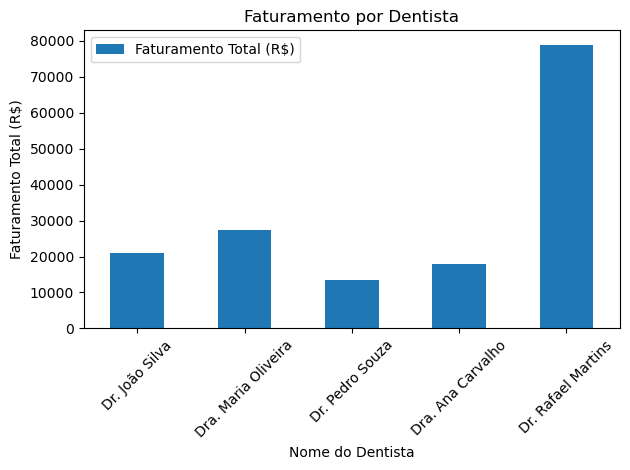

In [19]:
import matplotlib.pyplot as plt

# Exemplo de gráfico de faturamento
df.plot(x='Nome do Dentista', y='Faturamento Total (R$)', kind='bar')
plt.title('Faturamento por Dentista')
plt.ylabel('Faturamento Total (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('faturamento_por_dentista.png')  # Salvar gráfico como imagem

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Mês                                    5 non-null      object 
 1   Nome do Dentista                       5 non-null      object 
 2   Clientes Gerados pela Contento         5 non-null      int64  
 3   Procedimentos de Odontologia Estética  5 non-null      object 
 4   Número de Procedimentos Realizados     5 non-null      int64  
 5   Preços dos Procedimentos (R$)          5 non-null      object 
 6   Faturamento Total (R$)                 5 non-null      float64
dtypes: float64(1), int64(2), object(4)
memory usage: 412.0+ bytes
